# Table of Content
## 1. Overview

    1.1 Description of dataset
    1.2 Goal of project
    1.3 step to achieve the goal

## 2. Data Cleaning

    2.1 Downloading the data
    2.2 Data cleaning

## 3. Exploritory Data Exploration

    3.1 Data exploration
    3.2 Visualization

## 4. Models

    4.1 Logistic regression
    4.2 K-nearest neighbors model

## 5. Conclusion

    5.1 Summary
    5.2 Limitations
    5.3 Future Work


# 1. Overview

Before we jump into any data let's first briefly look at what is Heart Disease and how can data science be used as a tool to help with this disease.

Below is from John Hopkins University:

Heart disease accounts for 1 in every 4 deaths in the U.S., according to the Centers for Disease Control and Prevention (CDC). It is the leading cause of death for both American women and men.

Cardiovascular disease includes stroke, coronary heart disease, high blood pressure and rheumatic heart disease. The most common type of heart condition is coronary heart disease, according to the CDC.

Heart conditions develop when plaque builds up in the arteries, causing a narrowing of the interior of the arteries. As the arteries narrow, the flow of blood is decreased or blocked. In some cases, plaques can rupture and cause blood clots to form.

Understanding the anatomy of the heart, cardiac diagnostic tests, common symptoms of heart conditions and strategies of prevention will help safeguard cardiovascular health.

https://www.hopkinsmedicine.org/health/wellness-and-prevention/heart-conditions#:~:text=Heart%20disease%20accounts%20for%201,pressure%20and%20rheumatic%20heart%20disease.

As you can see heart disease is a serious issue being the leading cause of death for both American women and men. As was mentioned above, understanding the common symptoms of heart disease can help, that is where machine learning comes in.

Machine learning can help find patterns in data and in this case help predict if someone has heart disease.

In this project we will use data to train models using machine learning in order to predict if someone has heart disease or not.

## 1.1 Description of dataset

We will be analyzing the heart disease data set from University of California Irvine machine learning repository. This data set consist fo 14 different features and 303 observations. The description of the features from the website is the following:

    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
        Value 1: upsloping
        Value 2: flat
        Value 3: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    num: diagnosis of heart disease (angiographic disease status)
        Value 0: < 50% diameter narrowing
        Value 1: > 50% diameter narrowing

The num feature is the feature we will be trying to predict for this project.

Link to the UCI heart disease data: https://archive.ics.uci.edu/ml/datasets/heart+disease

## 1.2 Goal of project

The goal for this project is to create a model that can predict the patient's heart disease status with a F1 score of 85% or higher. The other goals will be to explore the data we have been given and find key insights into heart disease that could be helpful for the medical community going forward.

## 1.3 Step to acheive the goal

To achieve this goal we will be creating 2 different models. Because the nature of the problem is to determine if a patient is negative or positive, i.e 0 or 1, this is a binary classification problem and we will pick 2 algorithms that work well with binary classification. The algorithms we will be using are the following:

    Logistic Regression
    K-Nearest Neighbors

# 2. Data Cleaning
## 2.1 Downloading the data

In [1]:
if(!require(tidyverse)) install.packages("tidyverse")
if(!require(caret)) install.packages("dplyr")
if(!require(dplyr)) install.packages("dplyr")
if(!require(matrixStats)) install.packages("matrixStats")
if(!require(gam)) install.packages("gam")
if(!require(evtree)) install.packages("evtree")
if(!require(knitr)) install.packages("knitr")


library(tidyverse)
library(caret)
library(dplyr)
library(matrixStats)
library(gam)
library(evtree)
library(knitr)


#importing the University of California, Irvine Heart Disease Data set
heart <- read.csv("../input/heart-disease-uci/heart.csv")

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: caret

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count


Loading required package: gam

Loading required package: splines

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, 


## 2.2 Data Cleaning

First we are going to take a look at the data set and get an idea of what we need to clean and how the data set is structured


In [2]:
print("Head")
head(heart)
print("Dimension")
dim(heart)
print("Structure")
str(heart)
print("Summary")
summary(heart)

[1] "Head"


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


[1] "Dimension"


[1] 303  14

[1] "Structure"
'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...
[1] "Summary"


      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

In [3]:
sum(is.na(heart) == TRUE)

[1] 0

There are no NAs in this data set so we can move on to the next step!

# 3. Exploritory Data Exploration
## 3.1 Data exploration

Let's look at a summary of the data with just the observations without heart disease

In [4]:
heart %>% filter(target == 0) %>% summary()

      age            sex               cp            trestbps    
 Min.   :35.0   Min.   :0.0000   Min.   :0.0000   Min.   :100.0  
 1st Qu.:52.0   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :58.0   Median :1.0000   Median :0.0000   Median :130.0  
 Mean   :56.6   Mean   :0.8261   Mean   :0.4783   Mean   :134.4  
 3rd Qu.:62.0   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:144.8  
 Max.   :77.0   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :131.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:217.2   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:125.0  
 Median :249.0   Median :0.0000   Median :0.0000   Median :142.0  
 Mean   :251.1   Mean   :0.1594   Mean   :0.4493   Mean   :139.1  
 3rd Qu.:283.0   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:156.0  
 Max.   :409.0   Max.   :1.0000   Max.   :2.0000   Max.   :195.0  
     exang           oldpeak          slope             ca       
 Mi



Now let's take a look at a summary of the data with just the observations with heart disease


In [5]:
heart %>% filter(target == 1) %>% summary()

      age            sex               cp           trestbps    
 Min.   :29.0   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:44.0   1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:120.0  
 Median :52.0   Median :1.0000   Median :2.000   Median :130.0  
 Mean   :52.5   Mean   :0.5636   Mean   :1.376   Mean   :129.3  
 3rd Qu.:59.0   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :76.0   Max.   :1.0000   Max.   :3.000   Max.   :180.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 96.0  
 1st Qu.:208.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:149.0  
 Median :234.0   Median :0.0000   Median :1.0000   Median :161.0  
 Mean   :242.2   Mean   :0.1394   Mean   :0.5939   Mean   :158.5  
 3rd Qu.:267.0   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:172.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :



There looks to be some differences when you compare the observations for positive heart disease and negative heart disease. For examples, the sex for the positive heart disease leaned more towards male. The age on average was younger for negative heart disease observations. The average maximum heart rate achieved (thalach) was on average higher for the negative heart disease observations. Next let's continue analyzing the data with visualization.


## 3.2 Data Visualization

box plot of the data set


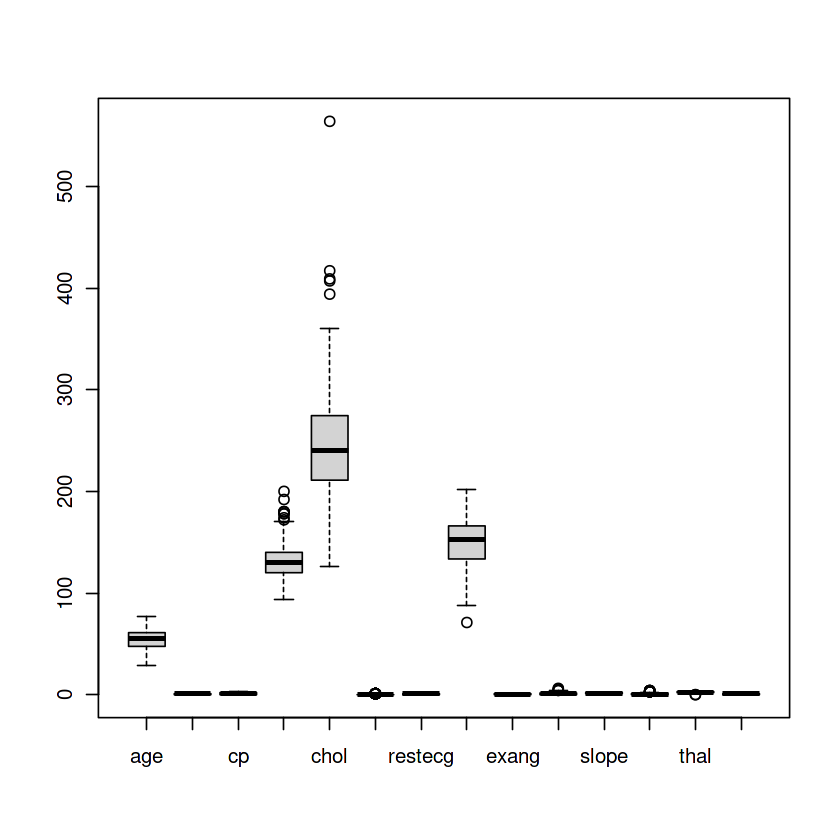

In [6]:
boxplot(heart)

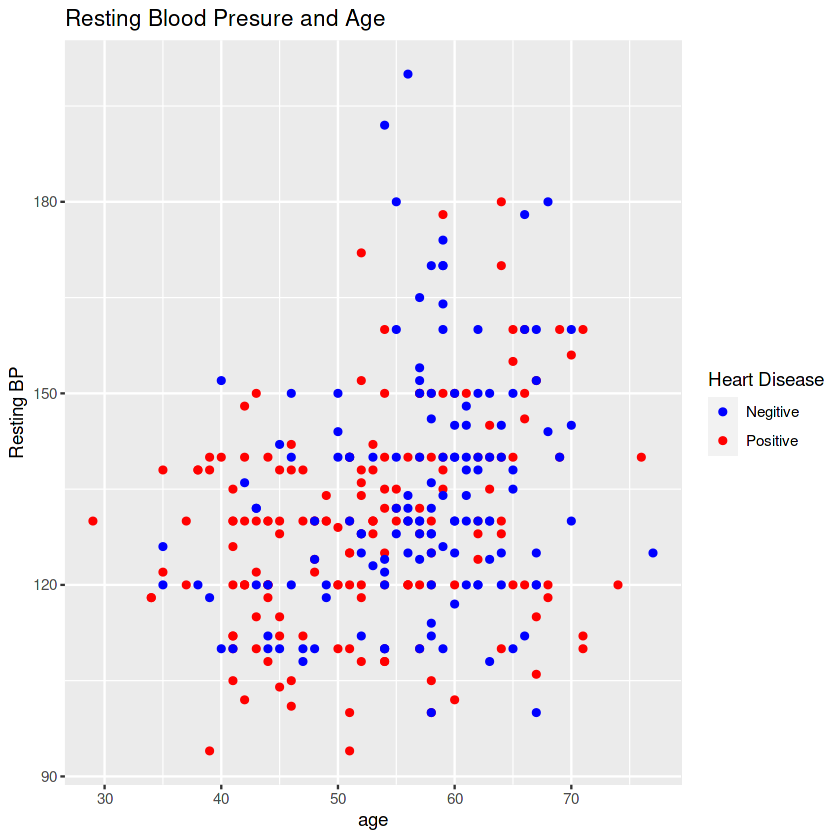

In [7]:
#Scatter plot of resting blood pressure and age
heart %>% ggplot(aes(age,trestbps)) +
  geom_point(aes(color = factor(target))) +
  ggtitle("Resting Blood Presure and Age") +
  ylab("Resting BP") +
  scale_color_manual(name = "Heart Disease",
                      labels = c("Negitive","Positive"),
                     values = c("blue","red"))

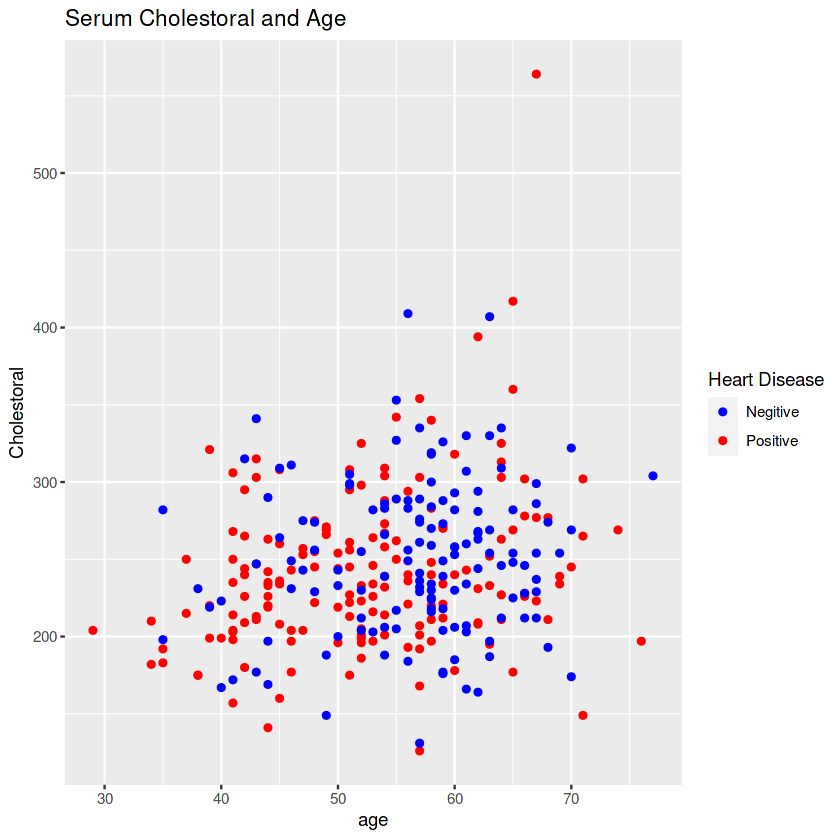

In [8]:
heart %>% ggplot(aes(age,chol)) +
  geom_point(aes(color = factor(target))) +
  ggtitle("Serum Cholestoral and Age") +
  ylab("Cholestoral") +
  scale_color_manual(name = "Heart Disease",
                     labels = c("Negitive","Positive"),
                     values = c("blue","red"))

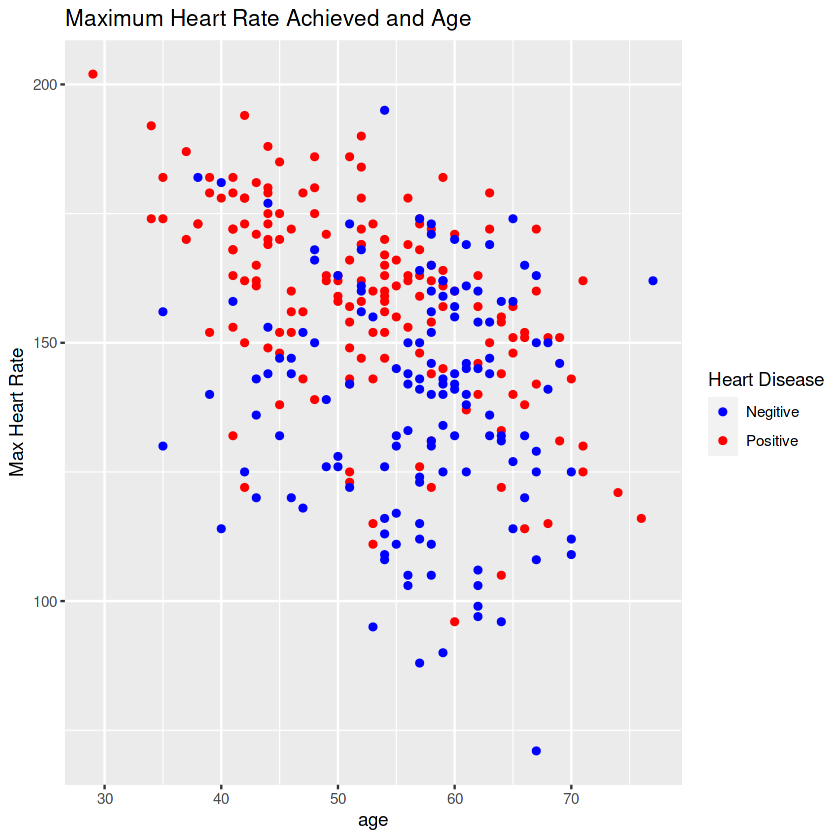

In [9]:
heart %>% ggplot(aes(age,thalach)) +
  geom_point(aes(color = factor(target)))+
  ggtitle("Maximum Heart Rate Achieved and Age") +
  ylab("Max Heart Rate") +
  scale_color_manual(name = "Heart Disease",
                     labels = c("Negitive","Positive"),
                     values = c("blue","red"))



Key insights from the last 3 graphs:

    1 Max Heart Rate had the largest separation between negative and positive
    2 Most positive results fall between age 55 - 70
    3 Very few observations of positive results after the age of 70. This could be due to having a very small sample size. This could also be because people with heart disease do not live past 70 years old very often.

I would like to look more into the max heart rate. This time we will create a scatter plot split by sex.

Scatter plot of maximum heart rate achieved, age and sex 0 = female and 1 = male


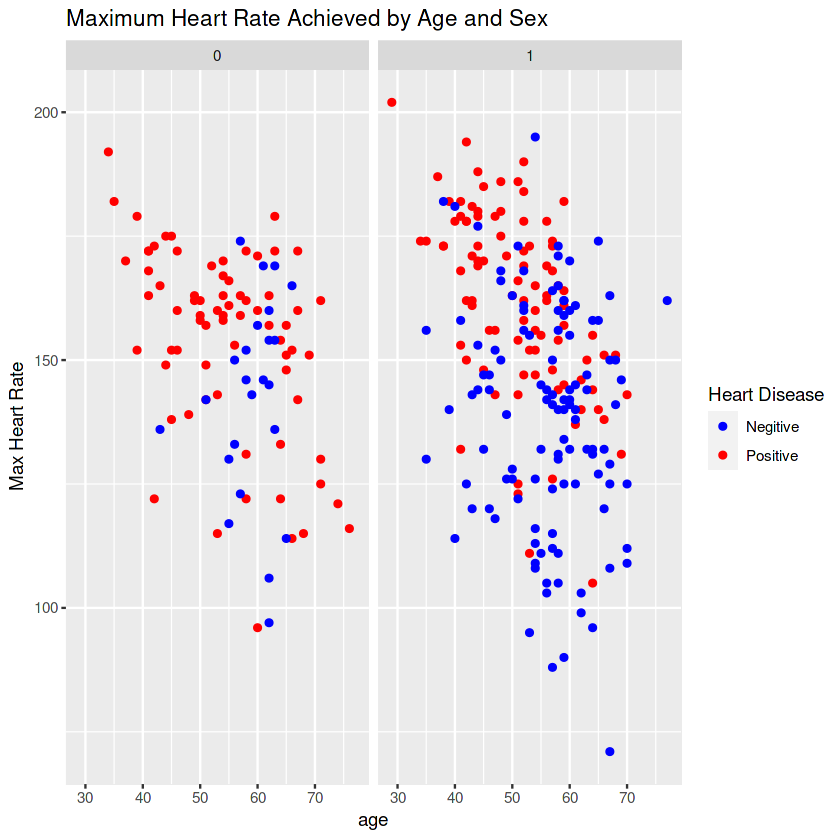

In [10]:
heart %>% ggplot(aes(age,thalach)) +
  geom_point(aes(color = factor(target))) +
  facet_grid(.~sex) +
  ggtitle("Maximum Heart Rate Achieved by Age and Sex") +
  ylab("Max Heart Rate") +
  scale_color_manual(name = "Heart Disease",
                     labels = c("Negitive","Positive"),
                     values = c("blue","red"))



Key insights from this graph:

    1 Only one female under the age of 50 observed positive
    2 The majority of male negative observations had max hr over 150
    3 For the males, the lower the max hr the more positive observations
    4 For the females, the lower the max hr does not result in more positive observations



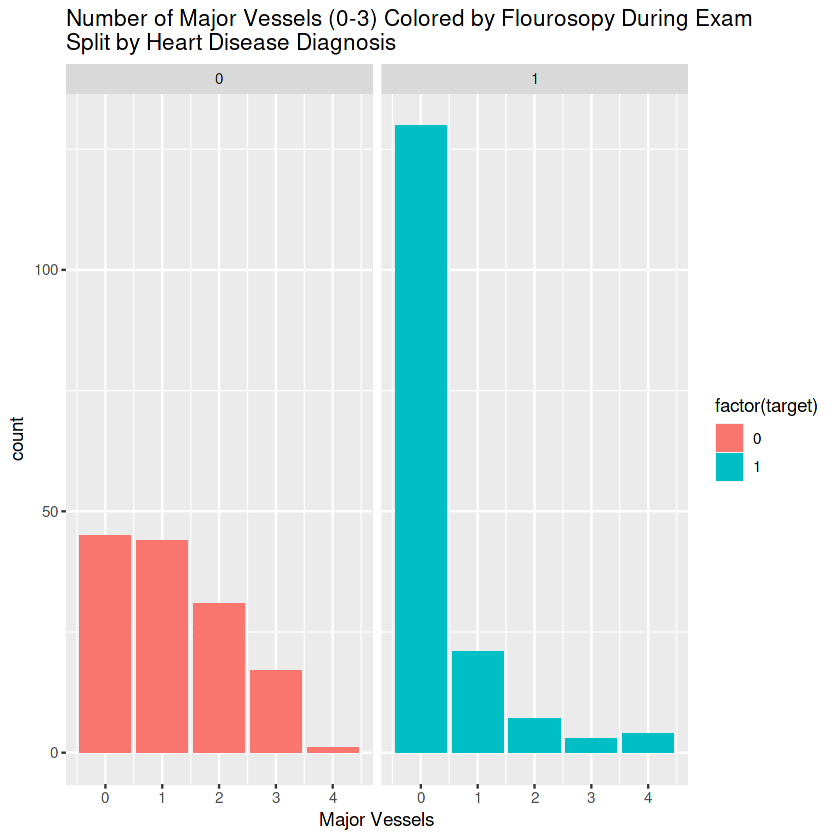

In [11]:
heart %>% ggplot(aes(ca)) +
  geom_bar(aes(fill=factor(target))) +
  facet_grid(.~target) +
  ggtitle("Number of Major Vessels (0-3) Colored by Flourosopy During Exam
Split by Heart Disease Diagnosis") +
  xlab("Major Vessels") +
  scale_color_manual(name = "Heart Disease",
                     labels = c("Negitive","Positive"),
                     values = c("blue","red"))



Key insight from this graph:

    Majority of negative observations have all three major vessels functioning properly


# 4. Models
## 4.1 Setting up the models

creating variable x which will consist of the data set expect the feature we are trying to predict

In [12]:
x <- heart[,-14]
y <- heart$target


set.seed(10,sample.kind = "Rounding")
test_index <- createDataPartition(y,times = 1, p=.2,list = FALSE)
test_x <- x[test_index,]
test_y <- y[test_index]
train_x <- x[-test_index,]
train_y <- y[-test_index]

Warning message in set.seed(10, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


In [13]:
control <- trainControl(method = "cv", number = 10, p = .9)

## 4.2 Logistic regression model

In [14]:


#training the model using train set
train_glm <- train(train_x, as.factor(train_y), method = "glm",
                   family = "binomial",
                   trControl = control)

#creating the predictions
glm_preds <- predict(train_glm, test_x)

#creating a confusion matrix
logistic_regression <- confusionMatrix(glm_preds,as.factor(test_y),positive = "1")

#viewing accuracy results
logistic_regression



Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 20  3
         1  6 32
                                          
               Accuracy : 0.8525          
                 95% CI : (0.7383, 0.9302)
    No Information Rate : 0.5738          
    P-Value [Acc > NIR] : 2.942e-06       
                                          
                  Kappa : 0.6938          
                                          
 Mcnemar's Test P-Value : 0.505           
                                          
            Sensitivity : 0.9143          
            Specificity : 0.7692          
         Pos Pred Value : 0.8421          
         Neg Pred Value : 0.8696          
             Prevalence : 0.5738          
         Detection Rate : 0.5246          
   Detection Prevalence : 0.6230          
      Balanced Accuracy : 0.8418          
                                          
       'Positive' Class : 1               
                                    

## 4.2 K-nearest neighbors model

In [15]:
#setting the seed
set.seed(7, sample.kind = "Rounding")

#creating tuning parameter for K
tuning <- data.frame(k = seq(2,200,2))

#training the model with the training set
train_knn <- train(train_x, as.factor(train_y),method = "knn",
                   trControl = control,
                   tuneGrid = tuning,)

Warning message in set.seed(7, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”
Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


,k
,<dbl>
12,24


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 10  8
         1 16 27
                                          
               Accuracy : 0.6066          
                 95% CI : (0.4731, 0.7293)
    No Information Rate : 0.5738          
    P-Value [Acc > NIR] : 0.3511          
                                          
                  Kappa : 0.1625          
                                          
 Mcnemar's Test P-Value : 0.1530          
                                          
            Sensitivity : 0.7714          
            Specificity : 0.3846          
         Pos Pred Value : 0.6279          
         Neg Pred Value : 0.5556          
             Prevalence : 0.5738          
         Detection Rate : 0.4426          
   Detection Prevalence : 0.7049          
      Balanced Accuracy : 0.5780          
                                          
       'Positive' Class : 1               
                                    

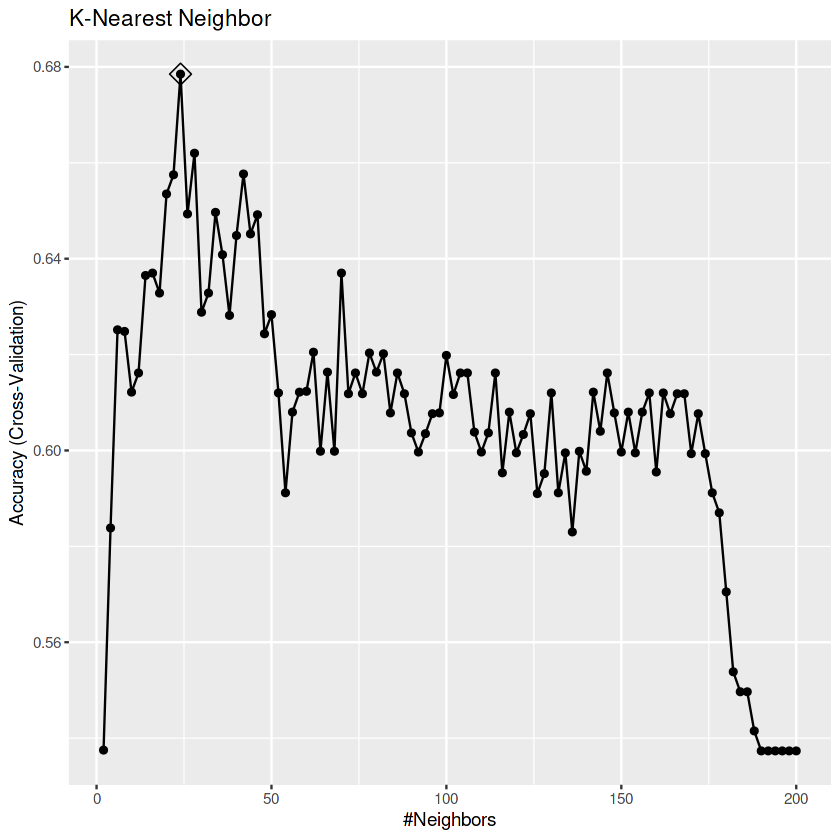

In [16]:
#creating graph of tuning result
ggplot(train_knn, highlight = TRUE) + 
  ggtitle("K-Nearest Neighbor")

#finding best tuning
train_knn$bestTune

#creating prediction
knn_preds <- predict(train_knn, test_x)

#creating a confustion matrix
Knearest_neighbors <- confusionMatrix(knn_preds,
                                      as.factor(test_y),
                                      positive = "1")

#viewing accuracy result
Knearest_neighbors

# 5. Conclusion
## 5.1 Summary

We set out to use the UCI data set on Heart Disease to create a model that could correctly predict Heart Disease diagnoses. We set a goal of achieving an F1 score of .85. We started by downloading the UCI data set on Heart Disease. We then cleaned the data set and prepared it for analysis. We split the data set into training and test sets. We trained 2 algorithms using the train set and applied the k-fold cross validation technique with a k of 10. We found that having a heart defect, the number of major vessels that were working, and the type of chest pain we the most important factors in determining if you have heart disease or not, using this data set. 

## 5.2 Limitations

For me the biggest limitation in this project is the size of the data set. With only 303 observations this is a very small sample size. The other limitation is the data within the data set. 14 features is enough to achieve a high prediction accuracy, as we proved, but I think with more features we could achieve a score over 91%.

## 5.3 Future Work

For the future, I would be curious to see how these algorithms preform on a much larger data set, say 10 million plus observation data set. Along with a data set that has more features such as: height, weight, if parents had heart disease, use of drugs and alcohol, exercise amount, etc. I would be curious to see which algorithms preform better and if any preform worse. One final thing that I would include is adding more algorithms to this project. These 2 algorithms are not the only algorithms that work well with classification and they may produce a higher F1 score.